In [1]:
import os, shutil

In [2]:
# 데이터 셋 복사 및 확인
!cp -r '/content/drive/MyDrive/Colab Notebooks/2021_11_11_이미지처리_cats_dogs/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 833868
277664 -rw------- 1 root root 284321224 Nov 11 04:06 test1.zip
556204 -rw------- 1 root root 569546721 Nov 11 04:06 train.zip


In [3]:
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/train.zip' -d '/content/datasets/' 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/t

In [4]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609264
drwxr-xr-x 2 root root 774144 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 04:06 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304292
drwxr-xr-x 2 root root 303104 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 04:06 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [6]:
# 반복실행을 위해 디렉터리 삭제 ( cats_and_dogs_small )
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [7]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [20]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [25]:
from tensorflow.keras import optimizers
model1.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [26]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 변경
        #target_size=(180, 180),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [28]:
batch_size = 20

history = model1.fit(train_generator,
                    steps_per_epoch = total_train // batch_size, 
                    epochs=30,
                    validation_data = val_generator,
                    validation_steps = total_val // batch_size)

Epoch 1/30
100/100 [==============================] - 43s 116ms/step - loss: 0.6901 - acc: 0.5285 - val_loss: 0.6781 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6615 - acc: 0.5990 - val_loss: 0.6443 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6228 - acc: 0.6660 - val_loss: 0.6252 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5776 - acc: 0.7075 - val_loss: 0.6242 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5483 - acc: 0.7270 - val_loss: 0.6032 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5183 - acc: 0.7395 - val_loss: 0.5672 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4882 - acc: 0.7625 - val_loss: 0.5551 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 1

#사전훈련네트워크 가져오기

In [31]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top=False, input_shape = (150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [33]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

# 데이터 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [39]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    print("피처, 레이블 : ", features.shape, labels.shape  )

    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        #print(  type(features_batch), features_batch.shape  )
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 
            # 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    #print(  type(features), features_batch.shape  )
    return features, labels

In [40]:
t_features, t_labels = extract_features(train_dir, 100)
print( t_features.shape, t_labels.shape )

피처, 레이블 :  (100, 4, 4, 512) (100,)
Found 2000 images belonging to 2 classes.
(100, 4, 4, 512) (100,)


In [41]:
%%time

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

피처, 레이블 :  (2000, 4, 4, 512) (2000,)
Found 2000 images belonging to 2 classes.
피처, 레이블 :  (1000, 4, 4, 512) (1000,)
Found 1000 images belonging to 2 classes.
피처, 레이블 :  (1000, 4, 4, 512) (1000,)
Found 1000 images belonging to 2 classes.
CPU times: user 44.2 s, sys: 1.06 s, total: 45.3 s
Wall time: 46.1 s


In [42]:
print( train_features.shape, train_labels.shape )
print( validation_features.shape, validation_labels.shape )
print( test_features.shape, test_labels.shape )

(2000, 4, 4, 512) (2000,)
(1000, 4, 4, 512) (1000,)
(1000, 4, 4, 512) (1000,)


In [53]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [54]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [55]:
%%time

# 완전 연결층
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.5972 - acc: 0.6515 - val_loss: 0.4463 - val_acc: 0.8500
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.4207 - acc: 0.8110 - val_loss: 0.3697 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3591 - acc: 0.8590 - val_loss: 0.3463 - val_acc: 0.8500
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3185 - acc: 0.8705 - val_loss: 0.3079 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2920 - acc: 0.8780 - val_loss: 0.2854 - val_acc: 0.8960
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2713 - acc: 0.8910 - val_loss: 0.2749 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2588 - acc: 0.9030 - val_loss: 0.2738 - val_acc: 0.8930
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

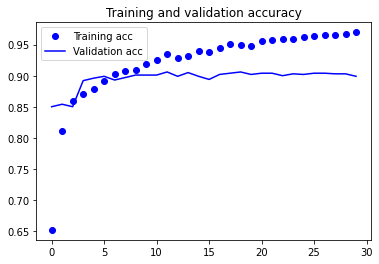

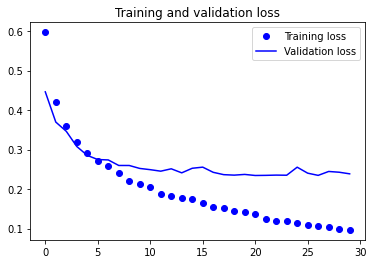

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
model.save('cats_dogs_small_VGG_3D_epoch.h5')

In [61]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [62]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [64]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [66]:
print('conv_base를 동결 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결 후 훈련되는 가중치의 수:',   len(model.trainable_weights))

conv_base를 동결 전 훈련되는 가중치의 수: 30
conv_base를 동결 후 훈련되는 가중치의 수: 4


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

batch_size = 20
epochs = 30

In [68]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [70]:
%%time

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,  # total_train // batch_size
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,  # total_val // batch_size
            verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/30
100/100 - 27s - loss: 0.5424 - acc: 0.7370 - val_loss: 0.4088 - val_acc: 0.8470 - 27s/epoch - 275ms/step
Epoch 2/30
100/100 - 26s - loss: 0.4011 - acc: 0.8360 - val_loss: 0.3342 - val_acc: 0.8760 - 26s/epoch - 259ms/step
Epoch 3/30
100/100 - 26s - loss: 0.3517 - acc: 0.8555 - val_loss: 0.3080 - val_acc: 0.8800 - 26s/epoch - 258ms/step
Epoch 4/30
100/100 - 26s - loss: 0.3267 - acc: 0.8580 - val_loss: 0.2931 - val_acc: 0.8790 - 26s/epoch - 260ms/step
Epoch 5/30
100/100 - 26s - loss: 0.3049 - acc: 0.8725 - val_loss: 0.2712 - val_acc: 0.8950 - 26s/epoch - 258ms/step
Epoch 6/30
100/100 - 26s - loss: 0.2812 - acc: 0.8835 - val_loss: 0.2598 - val_acc: 0.8960 - 26s/epoch - 257ms/step
Epoch 7/30
100/100 - 26s - loss: 0.2720 - acc: 0.8870 - val_loss: 0.2556 - val_acc: 0.8970 - 26s/epoch - 258ms/step
Epoch 8/30
100/100 - 26s - loss: 0.2730 - acc: 0.8850 - val_loss: 0.2531 - val_acc: 0.8970 - 26s/epoch - 258ms/step
Epoch 9/30
100/100 - 26s - loss: 0.2593 - acc: 0.8925 - val_loss: 0.2470

#미세조정

In [71]:
conv_base.layers[1].name

AttributeError: ignored